In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

## LOAD DATASET

In [5]:
from tensorflow.keras.datasets import cifar10
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


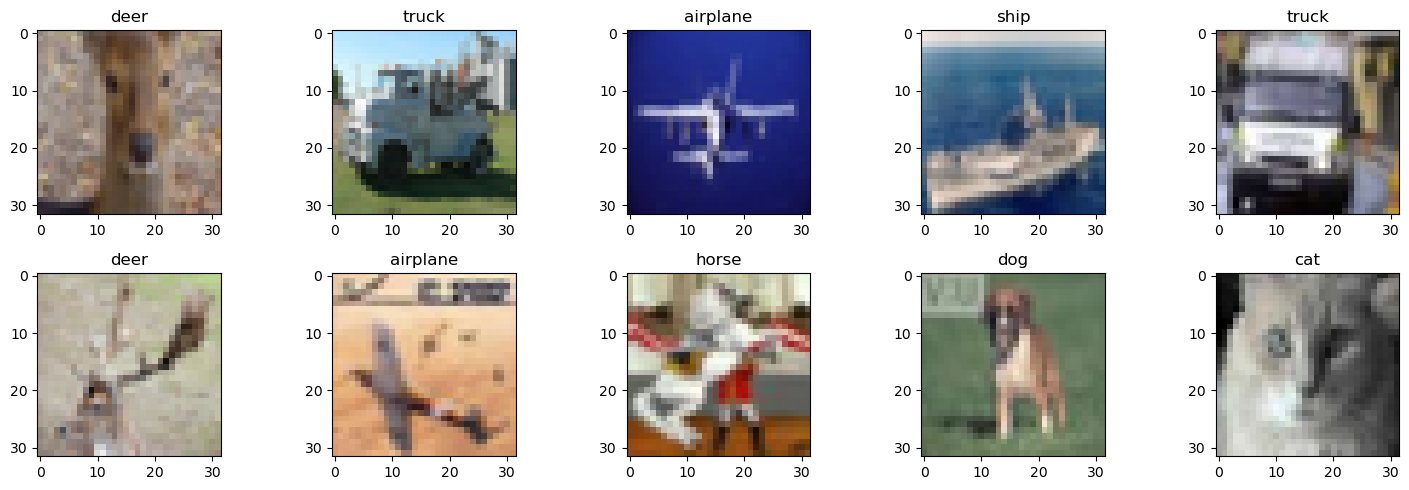

In [6]:
# CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select 10 random indices
random_indices = random.sample(range(len(x_train)), 10)

# Plot 10 random images with their labels
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx])
    plt.title(class_names[y_train[idx].item()])
    # plt.axis('off')

plt.tight_layout()
plt.show()

## MODEL

In [8]:
#Sequential is used in CNN implementation through Keras to build a linear stack of layers where each layer has exactly one input tensor and one output tensor.
model=Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation="relu"),
    Dense(10,activation="softmax")
    
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
history=model.fit(x_train, y_train, epochs=15, batch_size=64,
          validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3433 - loss: 1.8002 - val_accuracy: 0.5424 - val_loss: 1.3050
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5465 - loss: 1.2798 - val_accuracy: 0.5845 - val_loss: 1.1663
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6144 - loss: 1.1061 - val_accuracy: 0.6282 - val_loss: 1.0604
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6481 - loss: 1.0096 - val_accuracy: 0.6348 - val_loss: 1.0454
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6810 - loss: 0.9208 - val_accuracy: 0.6600 - val_loss: 0.9809
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6918 - loss: 0.8770 - val_accuracy: 0.6819 - val_loss: 0.9257
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7115 - loss: 0.8296 - val_accuracy: 0.6855 - val_loss: 0.9178
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7292 - loss: 0.7886 - 

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6986 - loss: 0.8955

Test accuracy: 0.6981


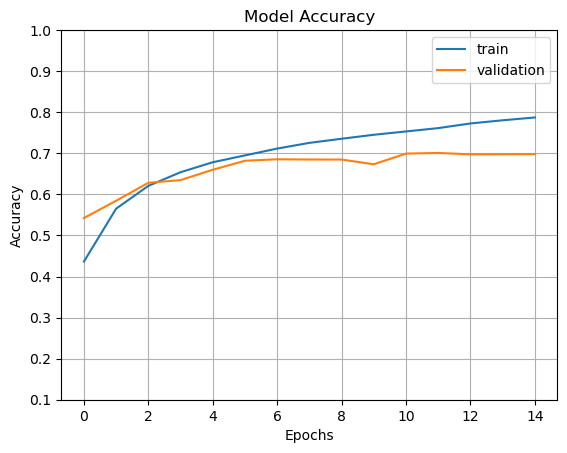

In [25]:
#Evaluating The Model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

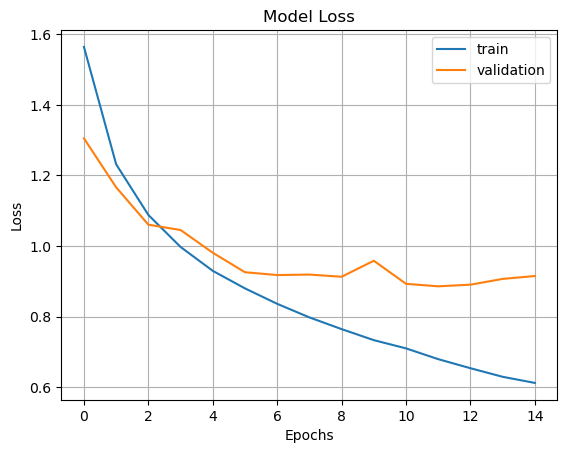

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Making Predictions


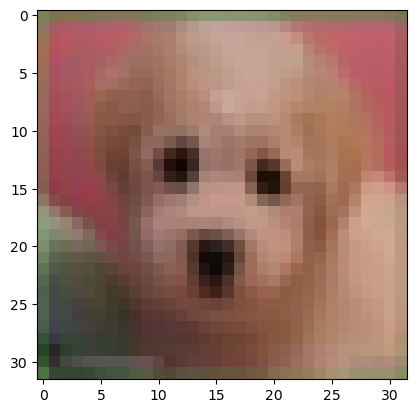

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
dog


In [44]:
# Pick a random index
idx2 = random.randint(0, len(y_test) - 1)

# Display the image at the randomly selected index
plt.imshow(x_test[idx2])
plt.show()

# Make the prediction (reshaping the image to match model input shape)
y_pred = model.predict(x_test[idx2].reshape(1, 32, 32, 3))

print(class_names[np.argmax(y_pred)])